In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os , glob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.feature import 

In [39]:
def imshow(image , title = None):
    plt.imshow(image , 'gray')
    plt.title(title)
    plt.axis("off")
    plt.show()
    

def showGridImage (images , labels , GSize = 5 , title = None):
    selectedIndex = np.random.choice(len(images), GSize*GSize , replace = False)
    fig , axes = plt.subplots(GSize , GSize, figsize = (10 , 10))
    for i , ax in enumerate(axes.ravel()):
        index = selectedIndex[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [40]:
mainPath = "./15Dec23/Image Classification/"
classes = os.listdir(mainPath)
images = []
labels = []
for cls in classes:
#     folderPath = mainPath+"/"+cls   
    folderPath = os.path.join(mainPath  ,cls)
#     imageNames = os.listdir(folderPath)
    for imgnm in os.listdir(folderPath):
        
        full_path = os.path.join(folderPath, imgnm)
        img = cv2.imread(full_path,0)
        img = cv2.resize(img , (100,100))
        images.append(img.flatten())
        label = classes.index(cls)
        labels.append(label)
        

#     print(folderPath)
# imageNames

In [41]:
# pd.DataFrame(images)

In [42]:
images = np.array(images)
labels = np.array(labels)

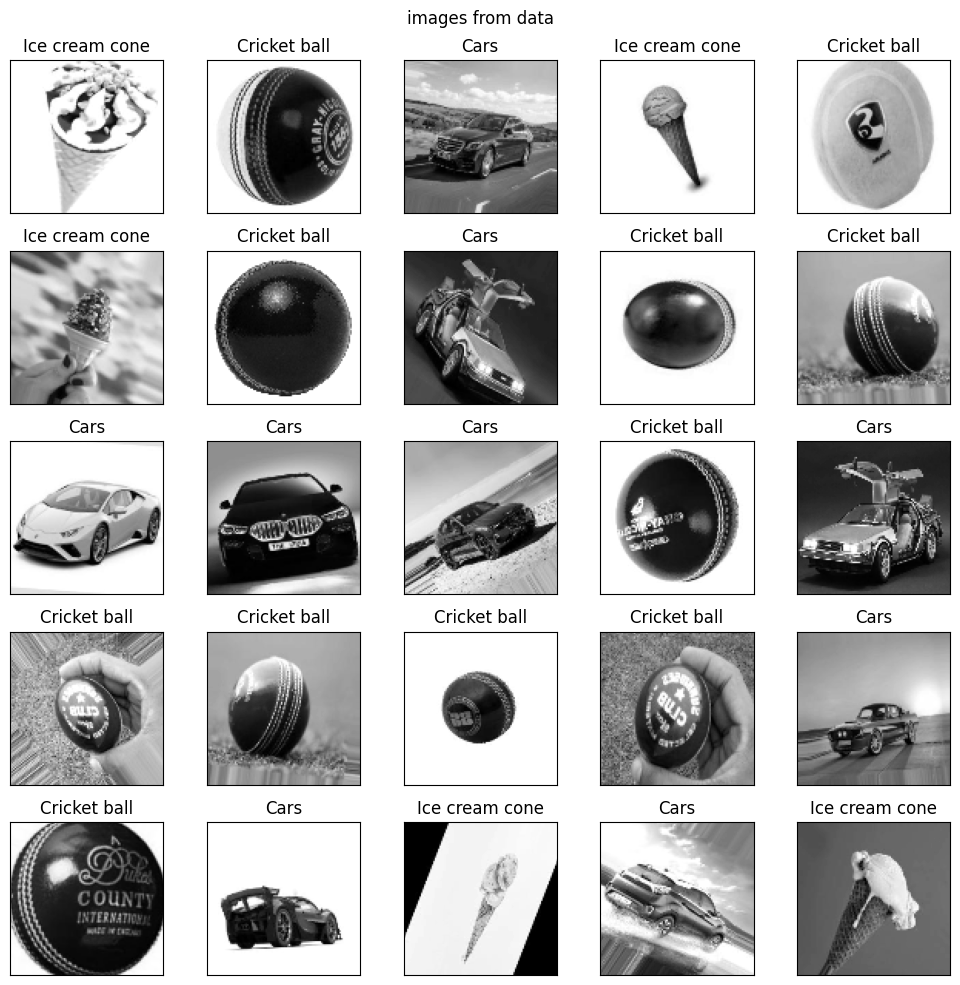

In [44]:
showGridImage(images , labels , GSize =5 , title ="images from data" )

In [54]:
x_train , x_test , y_train , y_test = train_test_split(images , labels , train_size=0.8 , random_state=0)

In [55]:
model= LogisticRegression()
model.fit(x_train , y_train)

E:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
preds = model.predict(x_test)

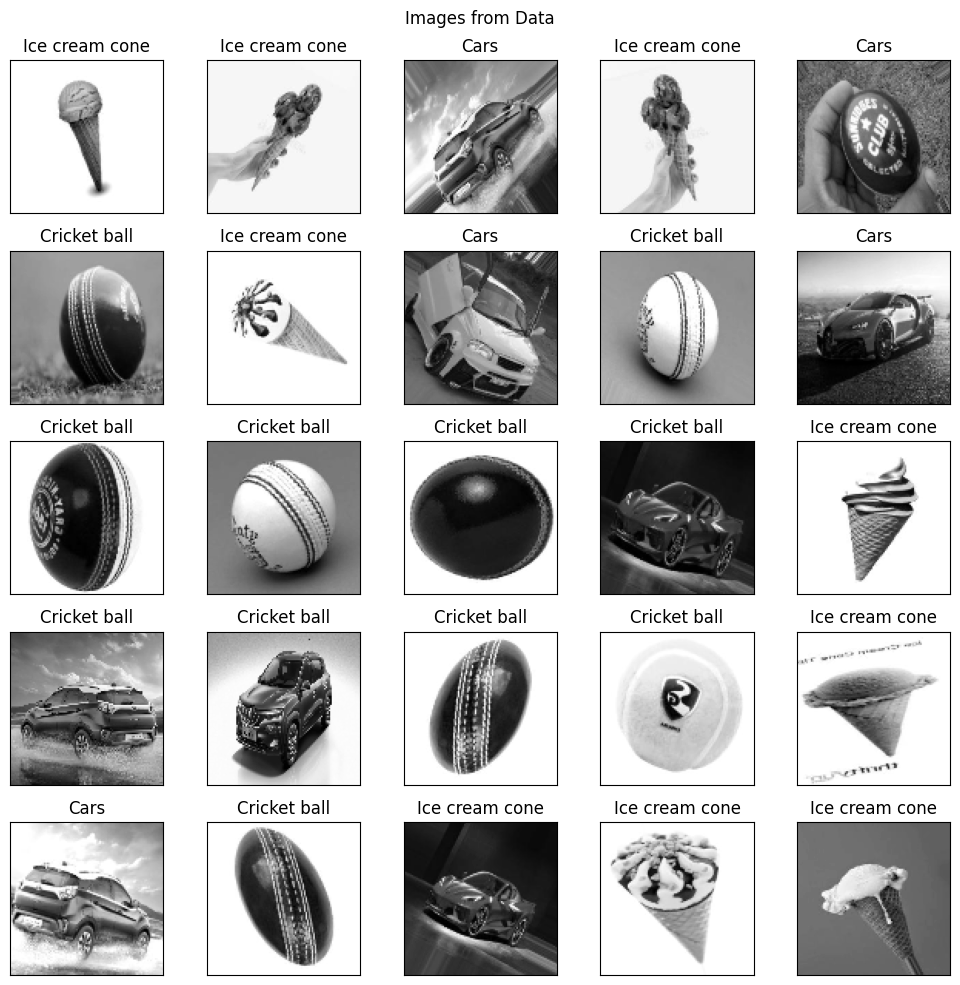

In [76]:
showGridImage(x_test , preds , 5 , "Images from Data")

In [78]:
accuracy_score(y_test, preds)

0.797979797979798

In [79]:
model.score(x_test , y_test)

1.0

In [62]:
cm = confusion_matrix(y_test , preds)
cm

array([[36, 18,  9],
       [ 8, 62,  2],
       [ 1,  2, 60]], dtype=int64)

<Axes: >

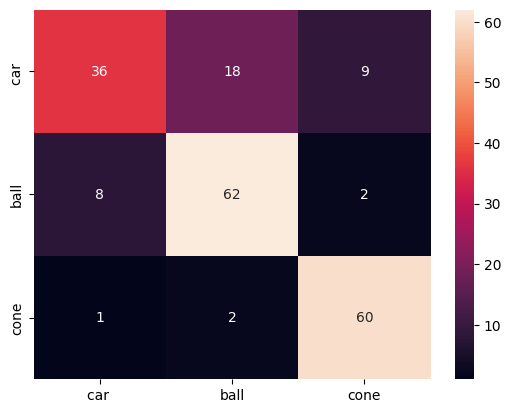

In [63]:
sns.heatmap(cm, annot = True , xticklabels=["car ", "ball" , "cone"] , yticklabels=["car ", "ball" , "cone"])